<a href="https://colab.research.google.com/github/Nuthan03/NN_Classification/blob/main/NN_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

A few types of classification problems:

*   Binary classification
*   Multiclass clasification
*   Multilabel classification



## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


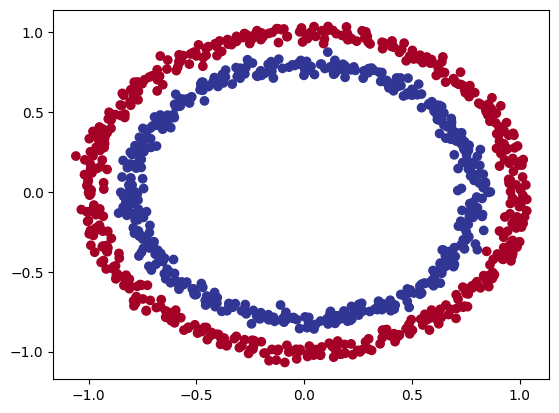

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(x), len(y)

(1000, 1000)

In [8]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [9]:
import tensorflow as tf


In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 5.2814 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.3299 - accuracy: 0.4680
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 2.1944 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7061 - accuracy: 0.4890


In [11]:
model.fit(x, y, epochs=200, verbose=0)
model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model.fit(x, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.5442 - accuracy: 0.5000


[4.54416561126709, 0.5]

## Improving our model

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5090


[0.696503221988678, 0.5090000033378601]

In [16]:
import numpy as np

In [17]:

def plot_dicision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stacks 2D arrays together

  # Make prediction using the trained model
  y_preds = model.predict(x_in)

  # Check for multiclass
  if model.output_shape[-1] > 1: # Checks the final dimension of the model's output_shape
    print("doing multi-class classfication")
    # We have to reshape our predictions to get them ready for plotting
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)
  else:
    print("doing binary classfication")
    y_preds = np.round(np.max(y_preds, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classfication


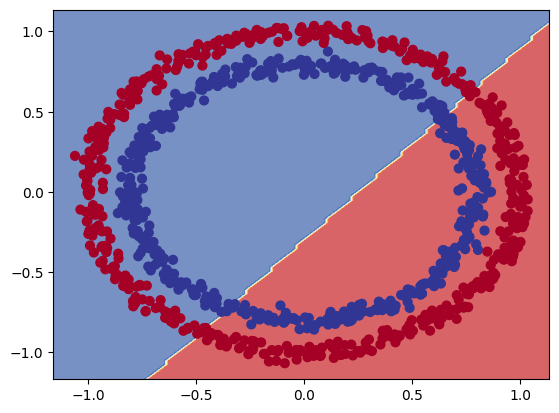

In [18]:
plot_dicision_boundary(model_3, x, y)

In [19]:
# Let's see if we can use our model can be used for a regression problem

tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into train and test split
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 354.1009 - mae: 354.1009
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 234.5556 - mae: 234.5556
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 118.5145 - mae: 118.5145
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 49.6322 - mae: 49.6322
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 78.7186 - mae: 78.7186
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 65.4257 - mae: 65.4257
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 43.1230 - mae: 43.1230
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 49.6676 - mae: 49.6676
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 41.8635 - mae: 41.8635
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.1028 - mae: 45.1028
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


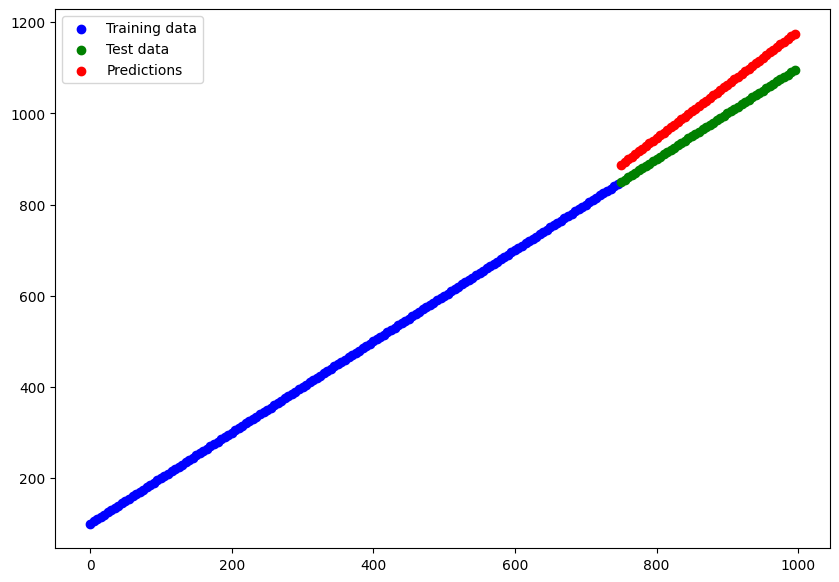

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity  

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8740 - accuracy: 0.4947
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8524 - accuracy: 0.4952
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7772 - accuracy: 0.4991
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7196 - accuracy: 0.4992
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6597 - accuracy: 0.5015
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6948 - accuracy: 0.4967
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6351 - accuracy: 0.5016
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6185 - accuracy: 0.4966
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5426 - accuracy: 0.5004
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5261 - accuracy: 0.5026
Epoch 11/

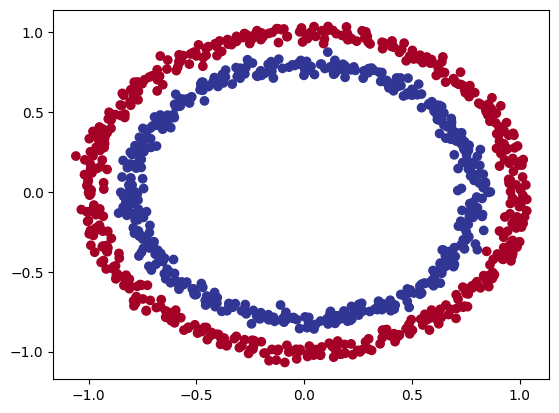

In [23]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classfication


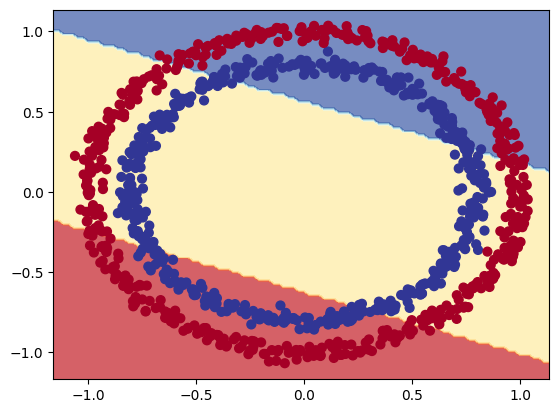

In [24]:
# Check the predictions for our latest model
plot_dicision_boundary(model_4, x, y)

In [25]:
tf.random.set_seed(42)

model_5 =tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.4354 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4092 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3405 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2823 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2482 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2316 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1845 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9574 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7116 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6574 - accuracy: 0.4780
Epoch 11/

In [26]:
# Time to replicate the multi-layer neural network from TesorFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


history = model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 5ms/step - loss: 4.5339 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 3.8244 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 3.4619 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 2.9740 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 2.8795 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 2.6377 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2761 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 2.0343 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 1.6673 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 1.1119 - accuracy: 0.5000
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.8870


[0.2709410786628723, 0.8870000243186951]

313/313 [==============================] - 1s 2ms/step
doing binary classfication


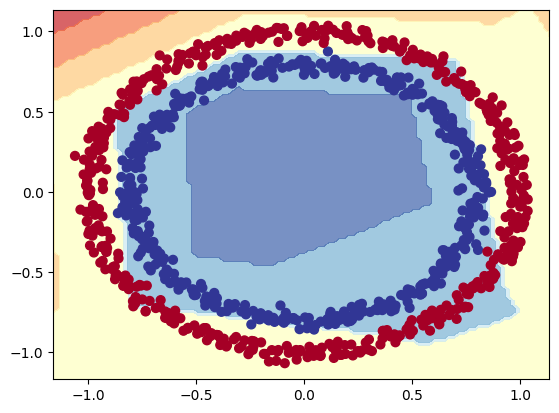

In [28]:
# Let's look at how our model did
plot_dicision_boundary(model_6, x, y)

In [29]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5080
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5260
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5420
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5270
Epoch 11/

In [30]:
# Evaluate the model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9980


[0.1550164669752121, 0.9980000257492065]

313/313 [==============================] - 1s 2ms/step
doing binary classfication


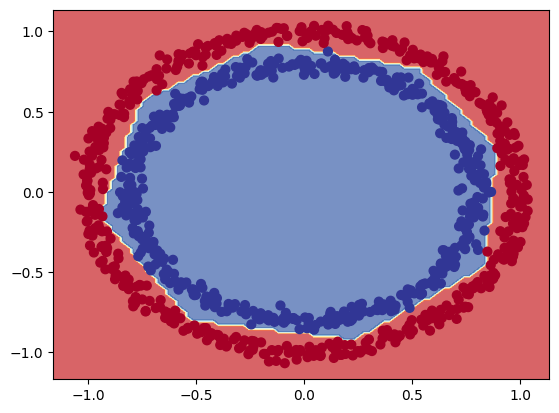

In [31]:
plot_dicision_boundary(model_7, x, y)